AirPassengers

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data.dtypes

date     object
value     int64
dtype: object

In [ ]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

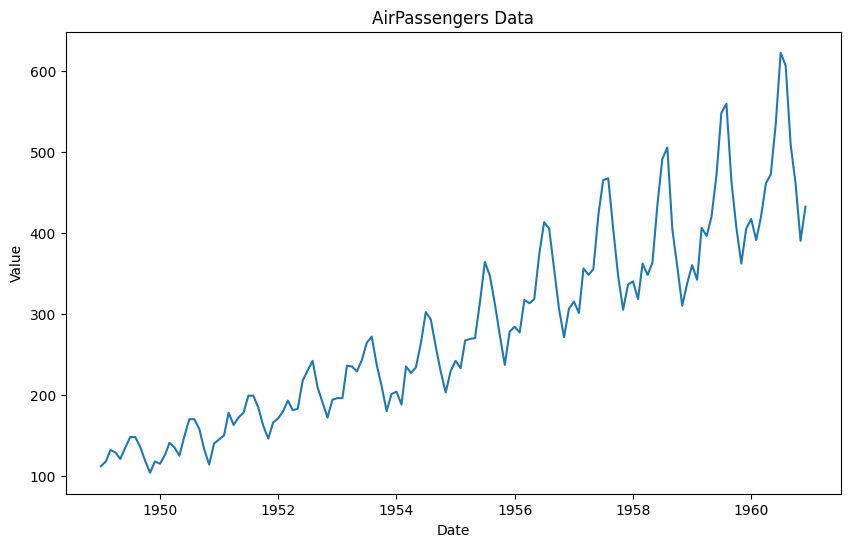

In [ ]:
# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('AirPassengers Data')
plt.show()

In [ ]:
data = data.set_index('date',inplace = False)

In [ ]:

# Calculate the simple average using rolling command
movingAverage = data.rolling(window=3).mean()
# Calculate the moving standard deviation using rolling command
movingSTD = data.rolling(window=5).std()


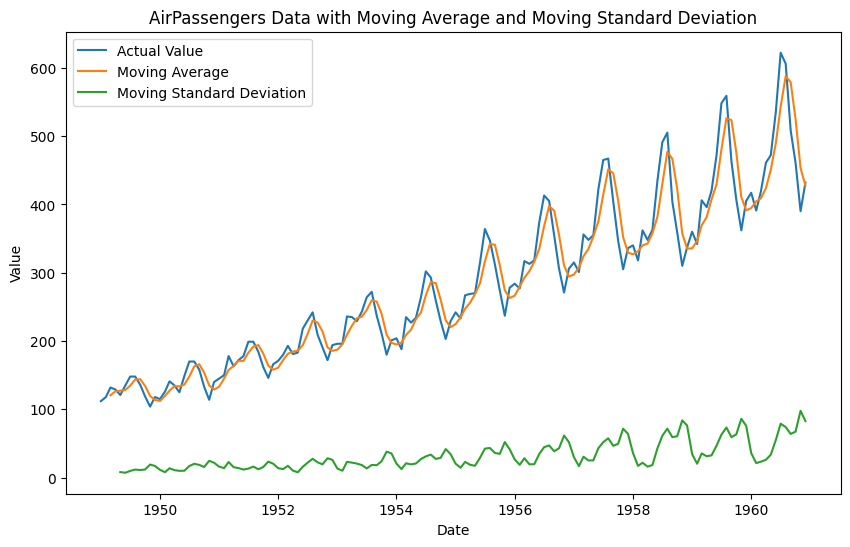

In [ ]:
# Plot the actual value, moving average, and moving standard deviation
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Actual Value')
plt.plot(movingAverage.index, movingAverage['value'], label='Moving Average')
plt.plot(movingSTD.index, movingSTD['value'], label='Moving Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('AirPassengers Data with Moving Average and Moving Standard Deviation')
plt.legend()
plt.show()


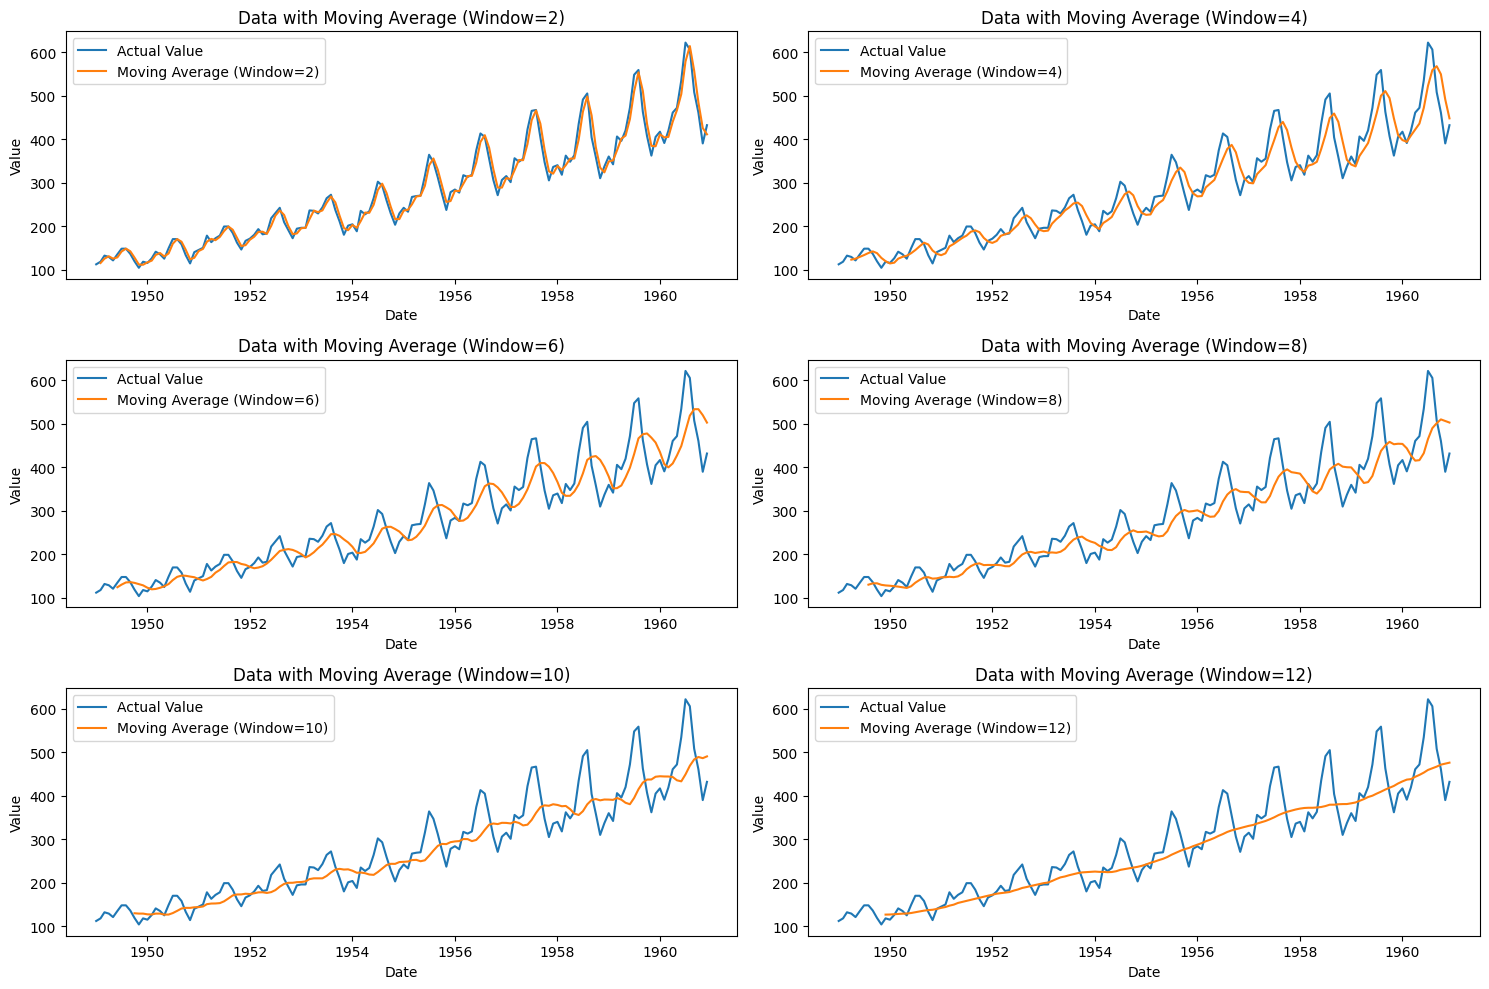

In [ ]:
plt.figure(figsize=(15, 10))

# Plot 6 subplots with different window values
for i, window in enumerate([2, 4, 6, 8, 10, 12]):
    movingAverage = data.rolling(window=window).mean()
    plt.subplot(3, 2, i+1)
    plt.plot(data.index, data['value'], label='Actual Value')
    plt.plot(movingAverage.index, movingAverage['value'], label=f'Moving Average (Window={window})')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Data with Moving Average (Window={window})')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#if there is a large diff in moving avg when window size is small or low that date we should analyse more

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# assuming null hypothisis as the series is non stationary
# and alternative hypothesis as series is stationary
# if test statistics is < critical value and p-value < 0.05 we reject the null hypothesis

In [ ]:
#ADF Test
def adf_test(timeseries):

 print('results of dickey_fuller test:')

 dftest=adfuller(timeseries,autolag='AIC')

 dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags used','Number of observations used'])

 for key,value in dftest[4].items():

  dfoutput['critical value(%s)'%key]=value

  print(dfoutput)

adf_test(data['value'])

results of dickey_fuller test:
Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
dtype: float64
Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
dtype: float64
Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


In [ ]:
# dataset is not stationary
# as the p value and test stastistics is < 0.05

In [ ]:
# KPSS Test
#here :
#     assuming that the null hypothesis as series is stationary
#     alternative hypothesis is series is non stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistics', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)

kpss_test(data['value'])


Results of KPSS Test:
Test Statistics          1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\aRj\AppData\Local\Temp\ipykernel_12744\2159506141.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [ ]:
#understood that data is non stationary
#so coverting to stationary data

In [ ]:
# Diffrencing :

<Axes: xlabel='date'>

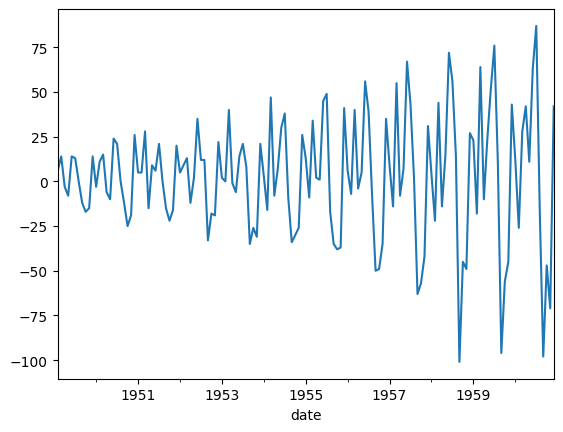

In [ ]:
data['value_diff'] = data['value'] - data['value'].shift(1)
data['value_diff'].dropna().plot()

In [ ]:
#infering that when time passes the diffrence increases:
    # when time is passing more passengers started to travel

In [ ]:
#sesonal difference :

<Axes: xlabel='date'>

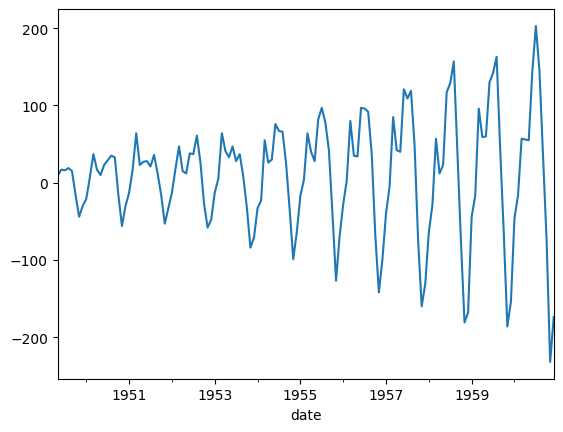

In [ ]:
data['value_diff_n'] = data['value'] - data['value'].shift(4)
data['value_diff_n'].dropna().plot()

In [ ]:
import numpy as np

<Axes: xlabel='date'>

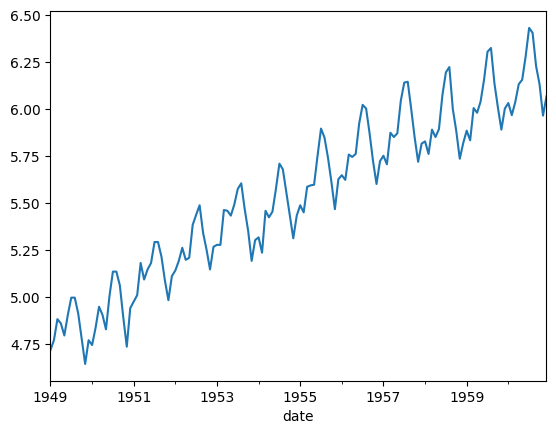

In [ ]:
#create a coloumn as log column which has logrithemic value of actual value
data['log_column'] = np.log(data['value'])
data['log_column'].plot()


<Axes: xlabel='date'>

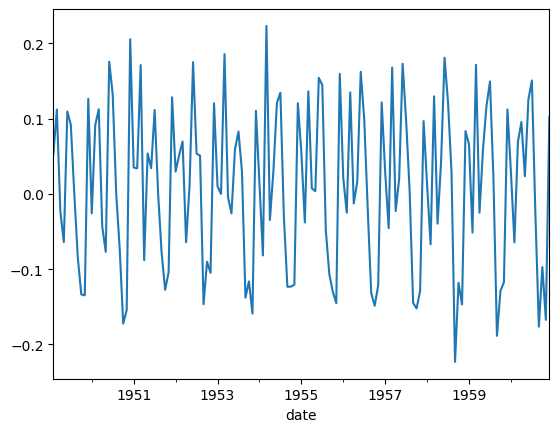

In [ ]:
#find the difference of logrthemic value and plot it
data['log_diff'] = data['log_column'] - data['log_column'].shift(1)
data['log_diff'].dropna().plot()


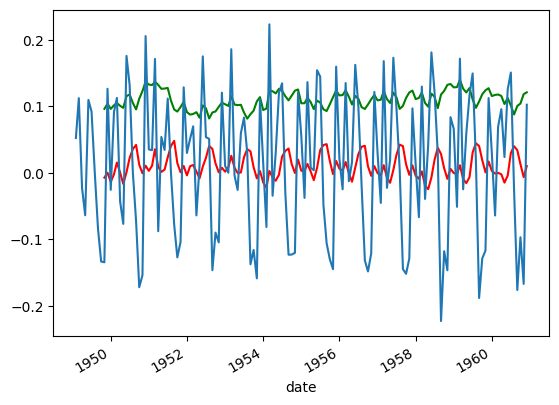

In [ ]:
#with this log difference value find moving average and moving standard deviation and plot it
movingAverage = data['log_diff'].rolling(window=10).mean()
movingSTD = data['log_diff'].rolling(window=10).std()
plt.plot(movingAverage,color='red',label='movingAverage')
plt.plot(movingSTD,color='green',label='movingSTD')
data['log_diff'].dropna().plot()

plt.show()

